# Central Limit Theorem

Consider that as a data scientist you would like to know the average hourly wage for all US adults who make under `150$` per hour. This would be practically infeasible to collect all the wage data for all the population matching this criteria. Instead, you take a sample of 150 people and record their hourly wage. The below code tries to mimic a random sample of 150 people and record their hourly wage with a sample mean of ~`30$`.

In [1]:
# import all the packages
import numpy as np
import matplotlib.pyplot as plt
import random

Mean of the sample: 26.087592981012158


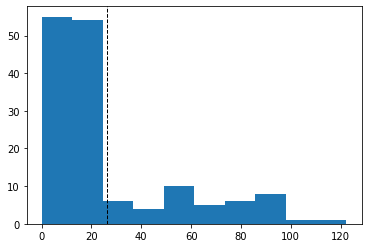

In [2]:
l1 = [np.random.uniform(0,20) for i in range(100)]
l2 = [np.random.uniform(0,100) for i in range(30)]
l3 = [np.random.uniform(0,150) for i in range(20)]
sample = l1+l2+l3
print(f'Mean of the sample: {np.mean(sample)}')
plt.hist(sample,10)
plt.axvline(np.mean(sample), color='k', linestyle='dashed', linewidth=1);

This sample mean is not EXACTLY the same as sample mean, but you hope that it is close enough. But how do you know, how far the population mean is from this sample mean?

In order to answer this, lets assume that we actually know the hourly wage of all people in the populatio of interest. Supposing that the true average hourly wage is around ~ `28$` and histogram of the below population looks like the below plot.

Mean of the population: 28.458238718512455


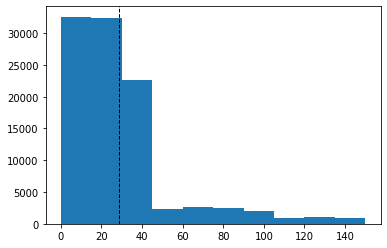

In [3]:
l1 = [np.random.uniform(0,40) for i in range(80000)]
l2 = [np.random.uniform(0,100) for i in range(10000)]
l3 = [np.random.uniform(0,150) for i in range(10000)]
pop = l1+l2+l3
print(f'Mean of the population: {np.mean(pop)}')
plt.hist(pop,10)
plt.axvline(np.mean(pop), color='k', linestyle='dashed', linewidth=1);

In order to quantify the uncertainity about our sample in figure 1, it will be useful if we get some more samples. Consider taking 10,000 random samples of 150 people from the population and calculate the mean hourly wage for each of those samples. We could then inspect the 10,000 sample means to see how much they vary. If the variation a lot, then we are less confident that any individual sample mean is representative of the population. Less variation would make us more confident.

Sample means: 28.480583390402487


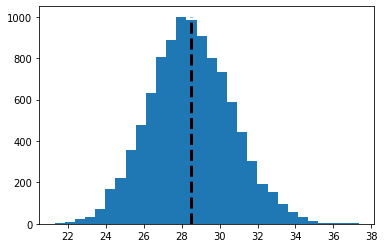

In [4]:
sample_means = []
 
for i in range(10000):
    samp = random.sample(pop, 150)
    sample_means.append(np.mean(samp))

print(f'Sample means: {np.mean(sample_means)}')
plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1000, lw=3, linestyles='dashed');

There are a few interesting things to notice about this distribution, which is called the sampling distribution of the mean:

- Unlike the population distribution, which is very right-skewed, this distribution is (almost) normally distributed: symmetric with a single mode.
- The average of the sample means (black dotted line) is approximately equal to the population mean (28.44).
- The 10,000 sample means range approximately between 22 and 36 (plus or minus 6 dollars from the true mean).

**Now, lets try to formally define CLT**

Suppose we have a normally dsitributed population of 100,000 data points as show below with a standard deviation of 10.

10.001243668756114


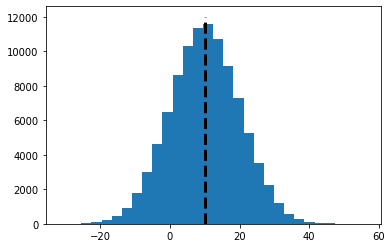

In [5]:
pop_stdev = 10
population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)
plt.hist(population, bins = 30);
print(np.mean(population))
plt.vlines(np.mean(population), 0, 12000, lw=3, linestyles='dashed');

Now if we try to take 10,000 samples from this entire population of 100,000 data points of sample size 100 and try to plot the means of each of those 10,000 samples (also known as sample means). 

As per the definition of CLT, the sampling distribution of the mean:

- is normally distributed
- is centered around population mean
- has standard deviation equal to the population standard deviation devided by the square root of the sample size. Also known as *Standard Error*

We can see in the below plot, that the sample means is centered around the population and is normally distributed. The standard error is equal to 10/sqrt(100000) = 0.1

Note: In this scenario, the population is normally distributed. The CLT will apply to non-normally distibuted population as well. We saw this in the hourly wage example where the true population was right skewed.

Sample means: 10.021740872187072
Standard error: 0.1


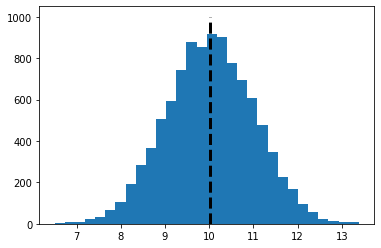

In [6]:
sample_means = []
 
for i in range(10000):
    samp = random.sample(population, 100)
    sample_means.append(np.mean(samp))
print(f'Sample means: {np.mean(sample_means)}')
print(f'Standard error: {pop_stdev/(10000**0.5)}')
plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1000, lw=3, linestyles='dashed');

that there are two levers on the width of the sampling distribution:

- The population standard deviation. Populations with more variation will yield sample means with more variation. For example, imagine sampling the heights of 5 year olds compared to sampling heights of 5-18 year olds. There is more variation in the heights of 5-18 year olds, so there will be more variation in individual samples.

- The sample size. The larger the sample size, the smaller the variation in repeated sample means. In the wage example above, imagine sampling only five people instead of 150. Those five sampled people could include one outlier that throws the whole sample mean off. If we sample 150 (or even more) people, we’re more likely to have high and low outliers that cancel each other out.

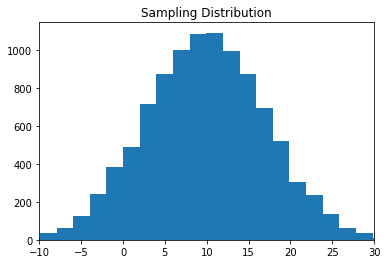

In [7]:
samp_size = 2
pop_stdev = 10

population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)

sample_means = []

for i in range(10000):
    samp = random.sample(population, samp_size)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.title('Sampling Distribution')
plt.xlim(-10, 30)

plt.show()

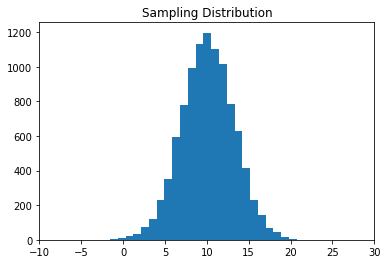

In [8]:
# increase sample size
samp_size = 10
pop_stdev = 10

population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)

sample_means = []

for i in range(10000):
    samp = random.sample(population, samp_size)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.title('Sampling Distribution')
plt.xlim(-10, 30)

plt.show()

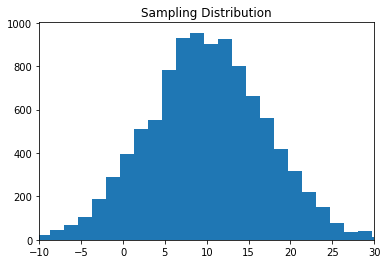

In [9]:
# decrease population variance 
samp_size = 2
pop_stdev = 10

population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)

sample_means = []

for i in range(10000):
    samp = random.sample(population, samp_size)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.title('Sampling Distribution')
plt.xlim(-10, 30)

plt.show()

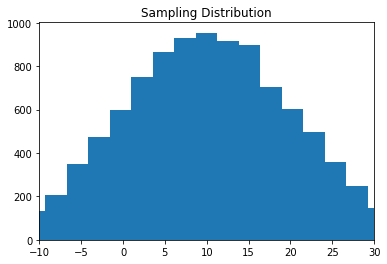

In [10]:
# increase population variance
samp_size = 2
pop_stdev = 15

population = np.random.normal(loc = 10, scale = pop_stdev, size = 100000)
population = list(population)

sample_means = []

for i in range(10000):
    samp = random.sample(population, samp_size)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.title('Sampling Distribution')
plt.xlim(-10, 30)

plt.show()